In [1]:
from tensorflow.keras.datasets import mnist

# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

5

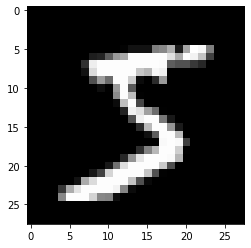

In [2]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')
y_train[0]

In [3]:
# Flattening the Image Data
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

# Normalizing the Image Data
x_train = x_train / 255
x_valid = x_valid / 255 

In [4]:
# Categorically Encoding the Labels
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1906 - accuracy: 0.9432 - val_loss: 0.0995 - val_accuracy: 0.9727
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0987 - accuracy: 0.9740 - val_loss: 0.1190 - val_accuracy: 0.9712
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0832 - accuracy: 0.9801 - val_loss: 0.1514 - val_accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0743 - accuracy: 0.9831 - val_loss: 0.1119 - val_accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0629 - accuracy: 0.9859 - val_loss: 0.1297 - val_accuracy: 0.9806


[[1.7628166e-24 7.9109828e-16 1.0000000e+00 8.2999004e-11 6.1400214e-35
  2.4490665e-21 6.2919866e-27 2.2470390e-13 1.6419472e-17 8.4782155e-24]]
Number is: 2


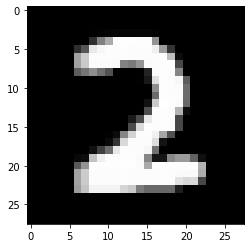

In [8]:
# Testing the model
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
import numpy as np

# This reshape corresponds to 1 image of 28x28 pixels with one color channel
image = image_utils.load_img("2.png", color_mode="grayscale", target_size=(28,28))
plt.imshow(image, cmap='gray')
image = image_utils.img_to_array(image)
image = image.reshape(1, 784)
image = image / 255 

prediction = model.predict(image)
print(prediction)
digits = "0123456789"
print("Number is: " +digits[np.argmax(prediction)])